<a href="https://colab.research.google.com/github/bandofpv/USNA-Robotics-Courses/blob/main/EW442/Project_5_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5: Regression — Optimizing Navy Recruiting Ad Spend
## EW442: AI & Data Science in Robotics | AY2026

---

### 🎯 Mission Brief

**SITUATION:** Navy Recruiting Command (NRC) allocates advertising budgets across Facebook, Instagram, and TikTok to generate recruiting leads. The Commanding Officer needs a data-driven recommendation for how to allocate next quarter's **$300,000 advertising budget** to maximize recruiting outcomes.

**MISSION:** Using 200 months of historical advertising data, you will build regression models to determine which platforms drive the most leads, identify diminishing returns and synergy effects, and deliver an optimal budget allocation recommendation.

**TWIST:** At the end of this assignment, the CO will ask a follow-up question that may change your entire recommendation. Be prepared to adapt.

---

### 📋 Deliverables
- One completed `.ipynb` notebook with all code cells executed
- Answers to **Q1–Q12** written in the designated markdown cells
- All answers must cite **specific values** from your analysis (Adj R², p-values, coefficients, RMSE)
- Final budget recommendation with justification

### ⚠️ Honor Reminder
All code scaffolding is provided. Your answers to qualitative questions must reflect YOUR analysis of YOUR outputs. Generic answers that do not reference specific numerical results will receive no credit.

---

## Phase 0: Setup and Data Loading

Run the cells below to import libraries and load the dataset. No modifications needed.

In [1]:
# Phase 0: Imports (DO NOT MODIFY)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Display settings
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', '{:.4f}'.format)
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Phase 0: Load Data
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('CleanAdData_v2.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (200, 8)
Columns: ['Month', 'Facebook', 'Instagram', 'TikTok', 'AdType', 'AdManagerPOC', 'Sales', 'QualityScore']


,Month,Facebook,Instagram,TikTok,AdType,AdManagerPOC,Sales,QualityScore
0,2024-01,121.4000,61.2000,63.8000,B,2,32.5000,76.8000
1,2024-02,63.5000,13.7000,47.2000,A,1,27.7000,69.8000
2,2024-03,80.2000,98.4000,26.9000,B,2,37.7000,76.0000
3,2024-04,243.5000,25.9000,74.0000,A,4,38.7000,46.8000
4,2024-05,239.8000,53.4000,20.9000,A,5,42.8000,51.5000


## Phase 1: Reconnaissance — Exploratory Data Analysis

Before building models, a good analyst surveys the terrain. Examine the dataset structure, distributions, and relationships.

---

In [3]:
# Phase 1a: Summary Statistics
# TODO: Display summary statistics for the dataset

df.describe()

,Facebook,Instagram,TikTok,AdManagerPOC,Sales,QualityScore
count,200.0000,200.0000,200.0000,200.0000,200.0000,200.0000
mean,148.0450,62.2305,41.0930,3.1150,37.0440,68.0330
std,80.2223,34.2478,22.4901,1.3531,8.2818,9.2557
min,6.9000,5.2000,2.2000,1.0000,17.0000,46.4000
25%,83.3000,31.8250,21.2750,2.0000,32.1000,60.9750
50%,149.0000,60.2500,40.6500,3.0000,37.2500,68.6000
75%,212.6250,91.2250,62.5250,4.0000,42.5500,74.7000
max,298.0000,119.3000,79.1000,5.0000,56.0000,90.6000


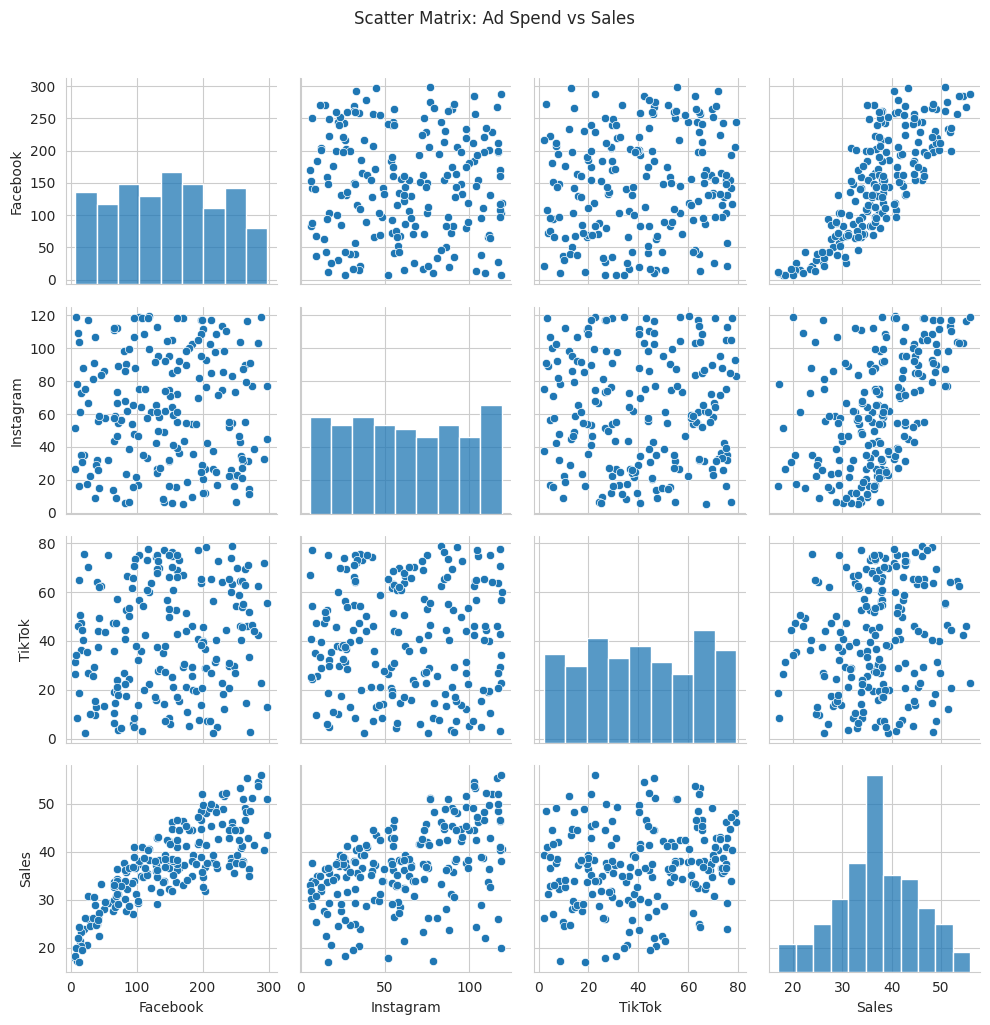

In [4]:
# Phase 1b: Scatter Matrix
# TODO: Create a scatter matrix of the ad spend columns vs Sales

sns.pairplot(df[['Facebook', 'Instagram', 'TikTok', 'Sales']])
plt.suptitle('Scatter Matrix: Ad Spend vs Sales', y=1.02)
plt.tight_layout()
plt.show()

### Q1: Initial Reconnaissance Report

Examine your summary statistics and scatter matrix. Answer the following:

1. What are the **mean and standard deviation** of Sales?
2. Which platform has the **widest spending range** (max − min)?
3. From the scatter matrix alone, which platform appears to have the **strongest visual relationship** with Sales? Describe the shape (linear, curved, scattered).

**YOUR ANSWER (Q1):**

The mean sales is 37.0440 and the standard deviation is 8.2818. This means that on average, the dataset reports about 37 sales leads with a fair amount of deviation (8). Facebook has the widest spending range with a minimum of 6.9 and maximum of 298. This wide spending range allows us to better align a linear regression. From the scatter matrix alone, Facebook appears to have the strongest visual relationship with sales. It has a curved shape, but gets scattered more as spending increases.

---

## Phase 2: Single Engagements — Simple Linear Regressions

Test each predictor individually to measure its standalone explanatory power. This is like sending out individual scouts before committing the full force.

---

In [5]:
# Phase 2a: Facebook Simple Regression
# TODO: Fit a simple linear regression: Sales ~ Facebook
# TODO: Print the model summary
model_fb = smf.ols('Sales ~ Facebook', data=df).fit()
print(model_fb.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     377.9
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           8.74e-48
Time:                        01:47:41   Log-Likelihood:                -599.34
No. Observations:                 200   AIC:                             1203.
Df Residuals:                     198   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6637      0.724     34.067      0.0

In [6]:
# Phase 2b: Instagram Simple Regression
# TODO: Fit a simple linear regression: Sales ~ Instagram
model_ig = smf.ols('Sales ~ Instagram', data=df).fit()
print(model_ig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     55.33
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           3.02e-12
Time:                        01:47:41   Log-Likelihood:                -681.45
No. Observations:                 200   AIC:                             1367.
Df Residuals:                     198   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0110      1.079     27.825      0.0

In [7]:
# Phase 2c: TikTok Simple Regression
# TODO: Fit a simple linear regression: Sales ~ TikTok
model_tt = smf.ols('Sales ~ TikTok', data=df).fit()
print(model_tt.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5.399
Date:                Thu, 12 Feb 2026   Prob (F-statistic):             0.0212
Time:                        01:47:41   Log-Likelihood:                -703.41
No. Observations:                 200   AIC:                             1411.
Df Residuals:                     198   BIC:                             1417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5785      1.209     28.605      0.0

In [8]:
# Phase 2d: AdType Simple Regression
# TODO: Fit a regression: Sales ~ C(AdType)
# Note: C() tells statsmodels to treat AdType as a categorical variable
model_adtype = smf.ols('Sales ~ C(AdType)', data=df).fit()
print(model_adtype.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.735
Date:                Thu, 12 Feb 2026   Prob (F-statistic):             0.0547
Time:                        01:47:42   Log-Likelihood:                -704.23
No. Observations:                 200   AIC:                             1412.
Df Residuals:                     198   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.0104      0.767     49.

In [9]:
# Phase 2e: AdManagerPOC Regression
# TODO: Fit a regression: Sales ~ AdManagerPOC
model_poc = smf.ols('Sales ~ AdManagerPOC', data=df).fit()
print(model_poc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     85.88
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           3.29e-17
Time:                        01:47:42   Log-Likelihood:                -670.07
No. Observations:                 200   AIC:                             1344.
Df Residuals:                     198   BIC:                             1351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       26.5575      1.233     21.535   

In [10]:
# Phase 2f: Summary Table
# Fill in the Adj_R2 and p_value lists using the models you just created
Adj_R2 = [
    # YOUR CODE HERE: replace each None with model_xx.rsquared_adj
    model_fb.rsquared_adj,  # Facebook
    model_ig.rsquared_adj,  # Instagram
    model_tt.rsquared_adj,  # TikTok
    model_adtype.rsquared_adj,  # AdType
    model_poc.rsquared_adj,  # AdManagerPOC
]
p_value = [
    # YOUR CODE HERE: replace each None with model_xx.pvalues.iloc[1]
    model_fb.pvalues.iloc[1],  # Facebook
    model_ig.pvalues.iloc[1],  # Instagram
    model_tt.pvalues.iloc[1],  # TikTok
    model_adtype.pvalues.iloc[1],  # AdType
    model_poc.pvalues.iloc[1],  # AdManagerPOC
]

results_df = pd.DataFrame({
    'Predictor': ['Facebook', 'Instagram', 'TikTok', 'AdType', 'AdManagerPOC'],
    'Adj_R2': Adj_R2,
    'p_value': p_value
})
print(results_df.to_string(index=False))

   Predictor  Adj_R2  p_value
    Facebook  0.6544   0.0000
   Instagram  0.2145   0.0000
      TikTok  0.0216   0.0212
      AdType  0.0136   0.0547
AdManagerPOC  0.2990   0.0000


### Q2: Single Engagement Report

From your summary table, answer:

1. **Rank** all five predictors by Adj R² (highest to lowest). Cite the exact values.
2. Which predictor is **strongest**? Which is **weakest**?
3. Are all predictors statistically significant (p < 0.05)? List any that are NOT.

**YOUR ANSWER (Q2):**

Adj R²: 1. Facebook (0.6544), AdManagerPOC (0.2990), Instagram (0.2145), TikTok (0.0216), AdType (0.0136). The higher the high Adj R², the better the regression model fits the data. As a result, Facebook is the strongest predictor because of the high Adj R² (which confirms our visual observation of a strong relationship) and AdType is the weakest predictor because of the super low Adj R² (also confirming the scatter matrix). Only AdType has a p value above 0.05 with a p value of 0.0547 (making it not statistically significant). All other predictors are significant with a p value less than 0.05 (Facebook, Instagram, and AdManagerPOC have a p  value of 0 and TikTok has a p value of 0.0212). It would be advised to remove AdType from the regression model as it would likely degrade its performance.

---

## Phase 3: The Trap — When Numbers Lie

AdManagerPOC is a phone number assigned to the point-of-contact managing each campaign. It's just an ID number. Yet your regression showed it's "statistically significant."

**Something is wrong.** Let's investigate.

---

In [11]:
# Phase 3: Investigate the POC Trap
# This shows the average Facebook spend handled by each POC
print("Average Facebook spend by POC:")
print(df.groupby('AdManagerPOC')['Facebook'].mean())
print()
print("Number of months managed by each POC:")
print(df['AdManagerPOC'].value_counts().sort_index())

Average Facebook spend by POC:
AdManagerPOC
1    69.4719
2    76.9878
3   160.9853
4   183.0845
5   232.4857
Name: Facebook, dtype: float64

Number of months managed by each POC:
AdManagerPOC
1    32
2    41
3    34
4    58
5    35
Name: count, dtype: int64


### Q3: The Correlation ≠ Causation Trap

**Paste your groupby output above**, then answer:

1. What pattern do you see in **average Facebook spend** across POC numbers?
2. Why does AdManagerPOC appear to predict Sales, even though a phone number can't *cause* recruiting leads?
3. If you included AdManagerPOC in your final model, what operational mistake could result?

**YOUR ANSWER (Q3):**

Average Facebook spend by POC:

AdManagerPOC

1    69.4719

2    76.9878

3   160.9853

4   183.0845

5   232.4857

Number of months managed by each POC:

AdManagerPOC

1    32

2    41

3    34

4    58

5    35

Facebook spending tends to increase as POC category number increases, with the first POC achieving about 69.5 sales leads and the last POC with about 232.5 sales leads. This makes it appear that AdManagerPOC can predict sales because as the POC category number increases, Facebook spend increases which will result in an increase in sales (based on our positive coefficient/slope of 0.0836 in the previous linear regression). In reality, a phone number is just a phone number and a higher number can’t predict recruiting leads. It just so happens that spending is higher as phone numbers increase. If I included AdManagerPOC in the final model, I would make the incorrect conclusion that a higher phone number results in greater sales and proceed to purchase higher phone numbers (which is a waste of money). This type of analysis is crucial for avoiding these operational mistakes.

---

### ⚠️ Intel Checkpoint — Phases 2 & 3

*Review before proceeding:* At this point, your analysis should show **Facebook as the dominant predictor** (Adj R² > 0.60), with Instagram as a moderate second. TikTok and AdType should be weak individually. AdManagerPOC should look significant but is a confound — it adds nothing when the real predictors are in the model. If your results look very different, double-check your formula syntax.

---

## Phase 4: Combined Operations — Multiple Regression

Individual scouts told us which platforms matter alone. Now combine forces and see how they work together. Use only the **legitimate predictors** (not AdManagerPOC).

---

In [12]:
# Phase 4a: Multiple Regression with platforms that matter
# TODO: Based on your Phase 2 results, which platforms have a
# real effect on Sales? Build a multiple regression using ONLY
# those predictors.
# Syntax: smf.ols('Sales ~ Predictor1 + Predictor2', data=df).fit()

# YOUR CODE HERE
model_multi = smf.ols('Sales ~ Facebook + Instagram + TikTok', data=df).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     506.9
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           4.66e-92
Time:                        01:47:42   Log-Likelihood:                -489.10
No. Observations:                 200   AIC:                             986.2
Df Residuals:                     196   BIC:                             999.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5955      0.645     25.740      0.0

In [13]:
# Phase 4b: Verify POC adds nothing
# Compare to the model without POC
# TODO: Fit Sales ~ Facebook + Instagram + TikTok + AdManagerPOC
model_multi_poc = smf.ols('Sales ~ Facebook + Instagram + TikTok + AdManagerPOC', data=df).fit()
print(model_multi_poc.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     379.4
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           8.65e-91
Time:                        01:47:42   Log-Likelihood:                -488.82
No. Observations:                 200   AIC:                             987.6
Df Residuals:                     195   BIC:                             1004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.8236      0.714     23.549   

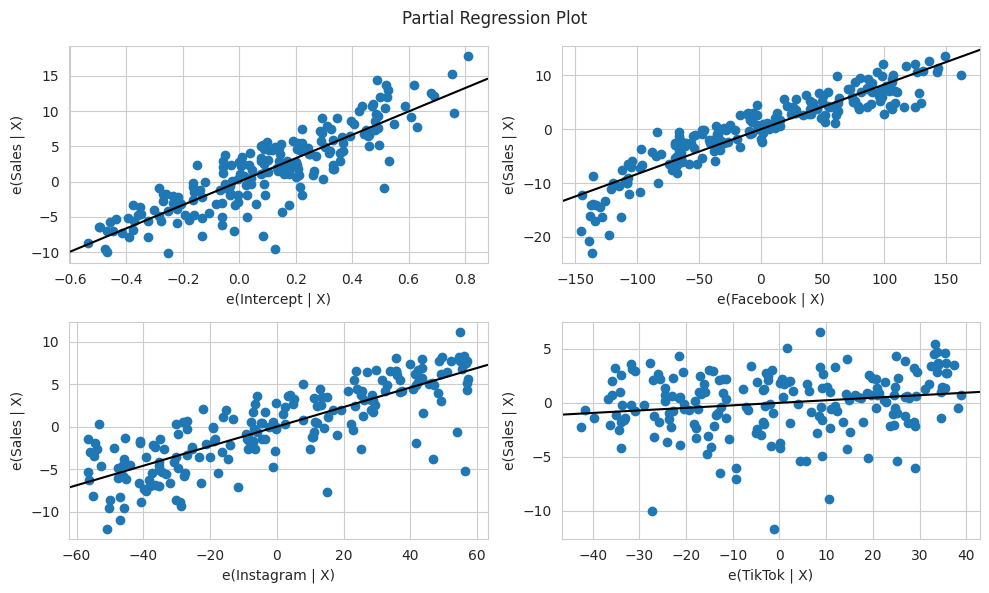

In [14]:
# Phase 4c: Partial Regression Plots
# These show each predictor's unique contribution AFTER accounting for the others
fig = sm.graphics.plot_partregress_grid(model_multi)
fig.tight_layout()
plt.show()

### Q4: Combined Operations Report

From your multiple regression output:

1. Report the **Adj R²** of the combined model. How much better is it than the best single predictor?
2. For each predictor (Facebook, Instagram, TikTok), report the **coefficient and p-value**. Which are statistically significant at p < 0.05?
3. What happened when you added AdManagerPOC? Report both Adj R² values and the POC p-value. Was the Phase 3 trap confirmed?

**YOUR ANSWER (Q4):**

The Adj. R² of the combined model is 0.884 which is 0.2296 greater than the best single predictor Facebook (0.6544). This results in a more accurate prediction model, which would suggest that combining Facebook, Instagram, and TikTok will help us achieve more accurate prediction on sales leads. Facebook’s coefficient is 0.0832 with a p value of 0. Instagram’s coefficient is 0.1151 with a p value of 0. TikTok’s coefficient is 0.0235 with a p value of 0.009. This makes all three predictors statistically significant with p values less than 0.05 and are thus all valid towards contributing to the model’s performance. Both Facebook (0.0832) and Instagram (0.1151) appear to have a higher coefficient/slope than TikTok’s low 0.0235. This concludes that Facebook and Instagram are more efficient at increasing sales leads per dollar spent in ads. When adding AdManagerPOC to the model, the Adj R² was the same at 0.884 with a POC p value of 0.457. This confirms that AdManagerPOC is not statistically significant due to the extremely high p value (way above 0.05) and does not improve the model due to an unchanged Adj R².

---

### ⚠️ Intel Checkpoint — Phase 4

*Review:* Your combined model should have Adj R² around 0.88. All three platforms should be significant (p < 0.05), with Facebook and Instagram as the strongest. Adding POC should NOT improve the model. If your Adj R² is below 0.80, check that you included all three platforms in your formula.

---

## Phase 5: Diminishing Returns — The Log Transformation

Look at your scatter plot of Facebook vs Sales from Phase 1. Does the relationship look perfectly straight, or does it **flatten at higher spending levels**?

In economics, this is called **diminishing returns** — the first \$50K of Facebook spend generates more leads than the *last* \$50K. A logarithmic transformation can capture this curvature.

---

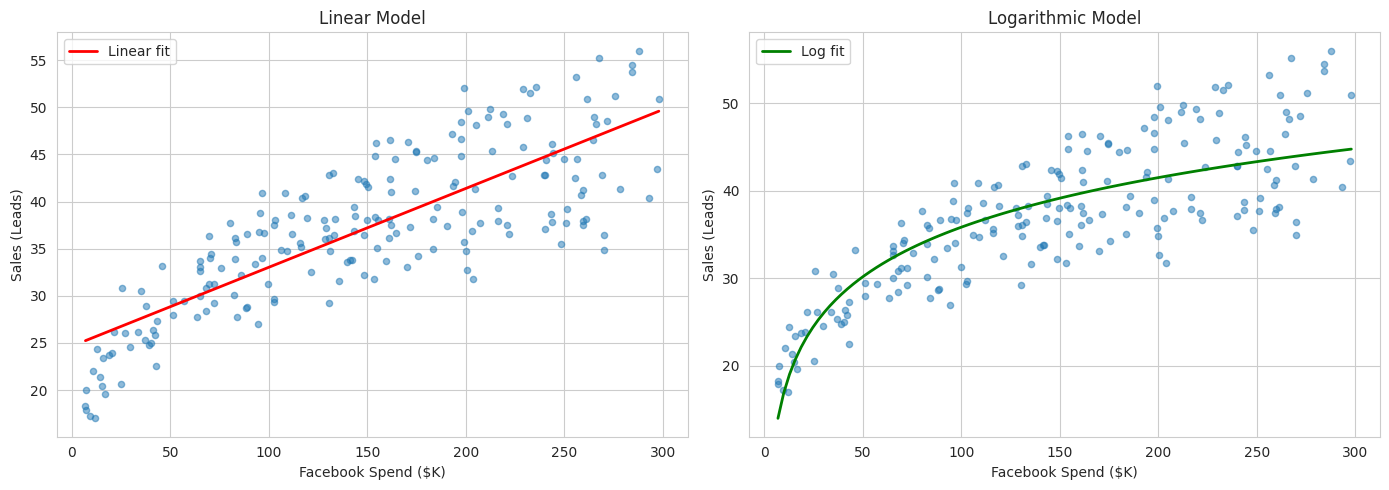

Linear model  — Adj R²: 0.6544
Log model     — Adj R²: 0.6847
Improvement:  +0.0303


In [15]:
# Phase 5a: Visualize the curvature
# TODO: Create scatter plots with both linear and log fits
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Linear fit
axes[0].scatter(df['Facebook'], df['Sales'], alpha=0.5, s=20)
x_range = np.linspace(df['Facebook'].min(), df['Facebook'].max(), 100)
axes[0].plot(x_range, model_fb.predict(pd.DataFrame({'Facebook': x_range})),
             'r-', linewidth=2, label='Linear fit')
axes[0].set_xlabel('Facebook Spend ($K)')
axes[0].set_ylabel('Sales (Leads)')
axes[0].set_title('Linear Model')
axes[0].legend()

# Right: Log fit
df['log_Facebook'] = np.log(df['Facebook'])
model_log_fb = smf.ols('Sales ~ log_Facebook', data=df).fit()
axes[1].scatter(df['Facebook'], df['Sales'], alpha=0.5, s=20)
axes[1].plot(x_range,
             model_log_fb.predict(pd.DataFrame({'log_Facebook': np.log(x_range)})),
             'g-', linewidth=2, label='Log fit')
axes[1].set_xlabel('Facebook Spend ($K)')
axes[1].set_ylabel('Sales (Leads)')
axes[1].set_title('Logarithmic Model')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Linear model  — Adj R²: {model_fb.rsquared_adj:.4f}")
print(f"Log model     — Adj R²: {model_log_fb.rsquared_adj:.4f}")
print(f"Improvement:  {model_log_fb.rsquared_adj - model_fb.rsquared_adj:+.4f}")

In [16]:
# Phase 5b: Binned analysis — see the diminishing returns
# This groups Facebook spend into 5 bins and shows average Sales per bin
df['FB_bin'] = pd.cut(df['Facebook'], bins=5)
binned = df.groupby('FB_bin', observed=False)['Sales'].agg(['mean', 'count']).round(1)
print("Average Sales by Facebook Spend Bin:")
print(binned)
print()
means = binned['mean'].values
increments = np.diff(means)
print("Increments between bins:", [f"+{x:.1f}" for x in increments])

Average Sales by Facebook Spend Bin:
                    mean  count
FB_bin                         
(6.609, 65.12]   24.7000     34
(65.12, 123.34]  34.1000     45
(123.34, 181.56] 38.6000     47
(181.56, 239.78] 43.0000     37
(239.78, 298.0]  44.1000     37

Increments between bins: ['+9.4', '+4.5', '+4.4', '+1.1']


### Q5: Diminishing Returns Analysis

1. Report the **Adj R²** for both the linear and log Facebook models. Which fits better?
2. From your binned analysis, list the **mean Sales** for each bin and the **increments** between consecutive bins. Do the increments increase, decrease, or stay constant?
3. In plain language: If NRC doubles Facebook spending from \$50K to \$100K, they gain approximately X leads. If they double from \$150K to \$300K, they gain approximately Y leads. Estimate X and Y from your binned analysis. What does this tell the CO about where the "sweet spot" is?

**YOUR ANSWER (Q5):**

The linear model has an Adj R² of 0.6544 and the log model has an Adj R² 0.6847. The log model fits better due to the 0.0303 increase in Adj R². This suggests that the log model will result in a better sales leads prediction compared to the linear regression. Bin 1 (6.609 - 65.12) has a mean of 24.7, Bin 2 (65.12, 123.34) has a mean of 34.1, Bin 3 (123.34 - 181.56) has a mean of 38.6, Bin 4 (181.56 - 239.78) has a mean of 43, Bin 5 (239.78 - 298.0) has a mean of 44.1. The increments between Bins 1 - 5 are as follows: +9.4, +4.5, +4.4, and +1.1. The increments are all positive, but decreases with bin number (which is as expected due to diminishing returns). So as spending increases the rate at which sales leads rise will actually decrease. If NRC doubles Facebook spending from \$50K to \$100K, they gain approximately 9.4 leads. If they double from \$150K to \$300K, they gain approximately 5.5 leads (4.4 + 1.1). This tells us that around \$100k in Facebook is likely the sweet spot as it takes the greatest advantage of increased spending without being too influenced by diminishing returns.

---

### ⚠️ Intel Checkpoint — Phase 5

*Review:* Your log model should beat linear by roughly 0.02–0.05 in Adj R². The binned analysis should show increments getting smaller as Facebook spend increases. If your log model is WORSE than linear, check that you used `np.log()` (natural log) and that your formula is `Sales ~ log_Facebook`.

---

## Phase 6: Synergy Analysis — Interaction Effects

So far, we've assumed each platform's effect is independent. But what if **Facebook and Instagram amplify each other**? When NRC runs coordinated campaigns across both platforms, the combined effect might exceed the sum of individual effects.

In regression, we test this with an **interaction term** (`Facebook:Instagram`).

---

In [17]:
# Phase 6a: Interaction Model
# TODO: Which two platforms might have a synergy effect?
# Build a model that includes their interaction term.
# Syntax: smf.ols('Sales ~ A * B', data=df).fit()
#   The * operator expands to: A + B + A:B (main effects + interaction)

# YOUR CODE HERE
model_interact = smf.ols('Sales ~ Facebook * Instagram', data=df).fit()
print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     690.0
Date:                Thu, 12 Feb 2026   Prob (F-statistic):          7.22e-104
Time:                        01:47:45   Log-Likelihood:                -461.34
No. Observations:                 200   AIC:                             930.7
Df Residuals:                     196   BIC:                             943.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.4441      0

In [18]:
# Phase 6b: Compare additive vs interaction
model_additive = smf.ols('Sales ~ Facebook + Instagram', data=df).fit()
print(f"Additive model (FB + IG):     Adj R² = {model_additive.rsquared_adj:.4f}")
print(f"Interaction model (FB * IG):  Adj R² = {model_interact.rsquared_adj:.4f}")
print(f"Improvement:                  {model_interact.rsquared_adj - model_additive.rsquared_adj:+.4f}")
print(f"\nInteraction term p-value: {model_interact.pvalues['Facebook:Instagram']:.6f}")

Additive model (FB + IG):     Adj R² = 0.8806
Interaction model (FB * IG):  Adj R² = 0.9122
Improvement:                  +0.0316

Interaction term p-value: 0.000000


### Q6: Synergy Report

1. Report the **Adj R²** for both the additive (FB + IG) and interaction (FB × IG) models. How much did adding the interaction improve the fit?
2. Is the interaction term **statistically significant**? Cite the p-value.
3. In operational terms, what does a **positive interaction** between Facebook and Instagram mean for NRC's advertising strategy? Why might coordinated campaigns across platforms be more effective than running them independently?

**YOUR ANSWER (Q6):**

The Adj R² for the additive model is 0.8806 and the Adj R² for the interaction model is 0.9122. This resulted in a better fit due to the 0.0316 increase in Adj R². The interaction term is statistically significant due to a p value of 0 which is less than 0.05. As a result of the higher Adj R² and valid p value, the interaction model will predict sales leads better than the additive model. The positive interaction between Facebook and Instagram means that NRC should run coordinated campaigns across both Facebook and Instagram to increase sales. This is likely more effective than running them independently because Facebook and Instagram use the same Ad manager (because they are both owned by the same company). So a user that uses both Facebook and Instagram will get targeted for your same ads. More user ad viewership will likely increase their chances of buying your product.

---

## Phase 7: Best Model — Putting It All Together

You now have intelligence from five phases of analysis. Combine your findings into the best possible model. Consider:
- Log transformation for Facebook (Phase 5)
- The FB × IG interaction (Phase 6)
- All three platforms (Phase 4)
- AdType as a categorical variable

---

In [19]:
# Phase 7a: Build your best model
# TODO: Combine everything you've learned from Phases 2-6.
# Consider: Which predictors matter? Log transforms?
# Interactions? AdType?
#
# Hint: You can combine log transforms and interactions in one formula:
#   smf.ols('Sales ~ np.log(X) + Y + X:Y + C(Category)', data=df).fit()

# YOUR CODE HERE
model_best = smf.ols('Sales ~ np.log(Facebook) + Instagram + Facebook:Instagram + TikTok', data=df).fit()

print(model_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):          1.29e-135
Time:                        01:47:46   Log-Likelihood:                -382.87
No. Observations:                 200   AIC:                             775.7
Df Residuals:                     195   BIC:                             792.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4622      1

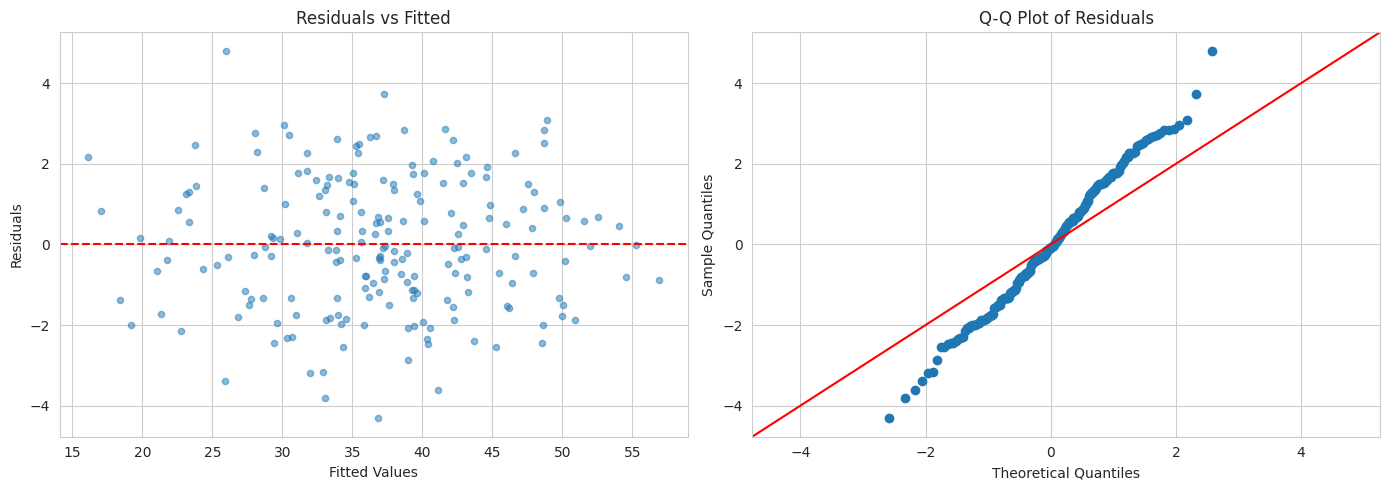

In [20]:
# Phase 7b: Residual Analysis
# A good model should have randomly scattered residuals (no patterns)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Fitted
axes[0].scatter(model_best.fittedvalues, model_best.resid, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted')

# Q-Q Plot
sm.qqplot(model_best.resid, line='45', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

### Q7: Best Model Justification

1. What is the **Adj R²** of your best model? How does it compare to the simple Facebook-only model from Phase 2?
2. What does the **residual plot** tell you? Are the residuals randomly scattered, or do you see patterns?
3. Why did you include (or exclude) each term in your model? Justify each decision based on evidence from earlier phases.

**YOUR ANSWER (Q7):**

The Adj R² for my best model is 0.960 which is 0.306 greater than the simple Facebook only model (0.654). This suggests that my best model is significantly better at predicting sales leads than only observing the linear regression of only Facebook. The residual plot tells me if the model doesn’t fit the data properly. So if I see a relationship (ex: linear, cyclical, etc.), then my model is not very accurate. Fortunately, the residuals are randomly scattered, confirming the validity of my model. I included both Facebook, Instagram, and TikTok in my analysis because those were the only predictors that were statistically significant in our earlier multiple regression analysis (Facebook and Instagram had a p value of 0 and TikTok had a p value of 0.009, all less than 0.05). Adding AdType will only degrade our model due to p value greater than 0.05 (0.0547 in our single regression analysis). AdManagerPOC was also excluded because by intuition, a higher phone number doesn’t result in more sales. The constant Adj R² observed in phase 4 confirmed this. I also included a log fit for Facebook to account for the observed diminishing returns, increasing Adj R². I also included the Facebook + Instagram interaction because that increased the Adj R² in the previous analysis and maintained a 0 p value (remaining statistical significance).

---

## Phase 8: Validation — Can We Trust This Model?

A model that fits the training data well might just be memorizing noise. We need to validate on **held-out data** the model has never seen.

---

In [21]:
# Phase 8a: Train/Test Split and RMSE
# NOTE: This cell validates the best model from Phase 7.
# If your best model formula differs from what's below, update the formula
# in the smf.ols() call to match YOUR best model from Phase 7a.
X = df[['Facebook', 'Instagram', 'TikTok', 'AdType']].copy()
X['log_Facebook'] = np.log(X['Facebook'])
X['FB_IG_interact'] = X['Facebook'] * X['Instagram']
y = df['Sales']

# First split with random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_train = pd.DataFrame({'Sales': y_train, 'Facebook': X_train['Facebook'],
                          'Instagram': X_train['Instagram'], 'TikTok': X_train['TikTok'],
                          'AdType': X_train['AdType']})
df_test = pd.DataFrame({'Sales': y_test, 'Facebook': X_test['Facebook'],
                         'Instagram': X_test['Instagram'], 'TikTok': X_test['TikTok'],
                         'AdType': X_test['AdType']})

model_val = smf.ols(
    'Sales ~ np.log(Facebook) + Instagram + Facebook:Instagram + TikTok',
    data=df_train).fit()

# Predictions on test set
y_pred = model_val.predict(df_test)
rmse_42 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"random_state=42 — Test RMSE: {rmse_42:.4f}")
print(f"Training Adj R²: {model_val.rsquared_adj:.4f}")

random_state=42 — Test RMSE: 1.6037
Training Adj R²: 0.9624


In [22]:
# Phase 8b: Change random_state to 99 and compare
# TODO: Repeat the train/test split with random_state=99
# Copy the approach from Phase 8a, changing only random_state

X = df[['Facebook', 'Instagram', 'TikTok', 'AdType']].copy()
X['log_Facebook'] = np.log(X['Facebook'])
X['FB_IG_interact'] = X['Facebook'] * X['Instagram']
y = df['Sales']

# First split with random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
df_train = pd.DataFrame({'Sales': y_train, 'Facebook': X_train['Facebook'],
                          'Instagram': X_train['Instagram'], 'TikTok': X_train['TikTok'],
                          'AdType': X_train['AdType']})
df_test = pd.DataFrame({'Sales': y_test, 'Facebook': X_test['Facebook'],
                         'Instagram': X_test['Instagram'], 'TikTok': X_test['TikTok'],
                         'AdType': X_test['AdType']})

model_val = smf.ols(
    'Sales ~ np.log(Facebook) + Instagram + Facebook:Instagram + TikTok',
    data=df_train).fit()

# Predictions on test set
y_pred = model_val.predict(df_test)
rmse_42 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"random_state=42 — Test RMSE: {rmse_42:.4f}")
print(f"Training Adj R²: {model_val.rsquared_adj:.4f}")

random_state=42 — Test RMSE: 1.7560
Training Adj R²: 0.9598


### Q8: Validation Report

1. Report the **Test RMSE** for both random states (42 and 99). Are they similar or very different?
2. Why does changing `random_state` change the RMSE? What does `random_state` control?
3. If the two RMSE values were **drastically different** (e.g., one was 2x the other), what would that suggest about the model?

**YOUR ANSWER (Q8):**

The RMSE for random state 42 is 1.6037 with an Adj R² of 0.9624 and the RMSE for random state 99 is 1.7560 with an Adj R² of 0.9598. They are only slightly different, but are similar for the most part. This slight change in RMSE and high Adj R² confirms that my model is robust to differing datasets and will still result in a strong prediction. Changing random_state changes the RMSE and Adj R² because it uses a different random seed to control the data shuffling process (affecting what data is in the training set and testing set). So if the data you use to train/test differs, you will get differing RMSE and Adj R² results. If the two RMSE values were drastically different, that would suggest that the model is not robust to different sets of data and must be reevaluated.

---

### ⚠️ Intel Checkpoint — Phase 8

*Review:* Your test RMSE should be in the range of 1.0–2.5 for both splits. If your RMSE is above 5.0, your model formula may have an error. If the two RMSE values differ by more than 50%, the model may be unstable.

---

## Phase 9: Budget Allocation — The $300K Question

The CO needs your recommendation: **How should NRC allocate $300,000 across Facebook, Instagram, and TikTok to maximize recruiting leads?**

Use your best model to predict Sales for different allocation scenarios.

---

**Approach Hints** (5 progressive hints — try to solve before expanding each):

<details>
<summary>💡 Hint 1: Structure</summary>
You need to test many possible (Facebook, Instagram, TikTok) combinations that sum to $300K.
</details>

<details>
<summary>💡 Hint 2: Grid</summary>
Try creating ranges for each platform (e.g., $0 to $300K in $10K steps) and testing all valid combinations.
</details>

<details>
<summary>💡 Hint 3: Filtering</summary>
For three platforms summing to $300K, if you fix Facebook and Instagram, TikTok = 300 - Facebook - Instagram. You only need to loop over two platforms.
</details>

<details>
<summary>💡 Hint 4: Prediction</summary>
For each allocation, create a DataFrame row and use model_best.predict() to get predicted Sales.
</details>

<details>
<summary>💡 Hint 5: Code skeleton</summary>

```python
results = []
for fb in range(10, 291, 10):
    for ig in range(10, 291 - fb, 10):
        tt = 300 - fb - ig
        if tt >= 0:
            # Create prediction row and predict
            ...
            results.append({'Facebook': fb, 'Instagram': ig, 'TikTok': tt, 'Predicted_Sales': pred})
```
</details>

---

In [23]:
# Phase 9: Budget Optimizer
# TODO: Find the optimal allocation of $300K across three platforms
# Use model_best to predict Sales for each candidate allocation
# See hints above for guidance
#
# Hint 5 — Code skeleton:
results = []
for fb in range(10, 291, 10):
    for ig in range(10, 291 - fb, 10):
        tt = 300 - fb - ig
        if tt >= 0:
            row = pd.DataFrame({
                'Facebook': [fb], 'Instagram': [ig],
                'TikTok': [tt], 'AdType': ['A']
            })
            pred = model_best.predict(row).values[0]
            results.append({'Facebook': fb, 'Instagram': ig, 'TikTok': tt, 'Predicted_Sales': pred})

best_allocation = max(results, key=lambda x: x['Predicted_Sales'])
print(best_allocation)

{'Facebook': 150, 'Instagram': 140, 'TikTok': 10, 'Predicted_Sales': np.float64(46.62824368187115)}


### Q9: Volume-Optimized Budget Recommendation

1. What is your **recommended allocation** (Facebook, Instagram, TikTok) to maximize total recruiting leads?
2. What is the **predicted number of leads** at this allocation?
3. Given what you learned about **diminishing returns** in Phase 5, does your optimal allocation make intuitive sense? Why doesn't the optimizer put ALL $300K into Facebook?

**YOUR ANSWER (Q9):**

My recommended allocation is \$150k in Facebook, \$140k in Instagram, and \$10k in TikTok in order to maximize total recruiting leads. This allocation results in about 46.628 sales leads according to my best model’s prediction. This makes intuitive sense because based on Phase 5, we concluded that putting all \$300k into Facebook would be inefficient because the rate at which sales leads rises with spending, decreases as you spend more in ads (displaying a logarithmic relationship). In other words, the first \$50k of Facebook spend generates more leads than the last \$50k. The even balance between the \$150k in Facebook and \$140k in Instagram also makes sense because we observed that the interaction between the two platforms is better than running independent campaigns. Furthermore, the small contribution into TikTok (\$10k) and large portions into Facebook and Instagram makes sense based on the coefficients of the multiple linear regression analysis. Facebook had a coefficient of 0.0832, Instagram had 0.1151, and TikTok had 0.0235. The smaller coefficient in TikTok results in a lower slope, so increasing ad spending towards TikTok will grow sales leads slower compared to Facebook & Instagram.

---

## Phase 10: The CO's Follow-Up

You brief the CO on your $300K allocation. She nods, then asks:

> *"Good work on lead volume. But how many of those leads actually become successful sailors? I don't want 500 names on a list if only 100 show up to boot camp ready to serve. What does the data say about lead QUALITY?"*

You notice a column you haven't used yet: **`QualityScore`** — a 0–100 rating of how likely each month's leads are to convert into recruits who pass initial training.

Time to dig deeper.

---

In [24]:
# Phase 10a: QualityScore Analysis
# TODO: Regress QualityScore on the same predictors
model_quality = smf.ols('QualityScore ~ Facebook + Instagram + TikTok + C(AdType)',
                         data=df).fit()
print(model_quality.summary())

                            OLS Regression Results                            
Dep. Variable:           QualityScore   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     281.3
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           8.68e-80
Time:                        01:47:56   Log-Likelihood:                -537.07
No. Observations:                 200   AIC:                             1084.
Df Residuals:                     195   BIC:                             1101.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.9474      0.868     82.

In [25]:
# Phase 10b: Compare volume drivers vs quality drivers
print("=== What Drives VOLUME (Sales) ===")
print(f"Facebook coefficient:  {model_multi.params['Facebook']:.4f}")
print(f"Instagram coefficient: {model_multi.params['Instagram']:.4f}")
print(f"TikTok coefficient:    {model_multi.params['TikTok']:.4f}")
print()
print("=== What Drives QUALITY (QualityScore) ===")
print(f"Facebook coefficient:  {model_quality.params['Facebook']:.4f}")
print(f"Instagram coefficient: {model_quality.params['Instagram']:.4f}")
print(f"TikTok coefficient:    {model_quality.params['TikTok']:.4f}")
adtype_coef = model_quality.params.get('C(AdType)[T.B]', 0)
print(f"AdType B bonus:        {adtype_coef:.4f}")

=== What Drives VOLUME (Sales) ===
Facebook coefficient:  0.0832
Instagram coefficient: 0.1151
TikTok coefficient:    0.0235

=== What Drives QUALITY (QualityScore) ===
Facebook coefficient:  -0.0907
Instagram coefficient: 0.0867
TikTok coefficient:    0.0322
AdType B bonus:        6.5634


In [26]:
# Phase 10c: Quality-Adjusted Leads
# Multiply Sales × (QualityScore / 100) to get "effective" recruiting leads
df['QualityAdjustedLeads'] = df['Sales'] * (df['QualityScore'] / 100)

print("Correlation with raw Sales (volume):")
print(df[['Facebook','Instagram','TikTok','Sales']].corr()['Sales'].round(4))
print()
print("Correlation with Quality-Adjusted Leads:")
print(df[['Facebook','Instagram','TikTok','QualityAdjustedLeads']].corr()['QualityAdjustedLeads'].round(4))

Correlation with raw Sales (volume):
Facebook    0.8100
Instagram   0.4674
TikTok      0.1629
Sales       1.0000
Name: Sales, dtype: float64

Correlation with Quality-Adjusted Leads:
Facebook               0.3912
Instagram              0.7186
TikTok                 0.1757
QualityAdjustedLeads   1.0000
Name: QualityAdjustedLeads, dtype: float64


### Q10: Quality Analysis

1. From the QualityScore regression, what is the **coefficient for Facebook**? What does the **sign** (positive or negative) tell you?
2. Which predictor has the **strongest positive effect** on quality? Cite the coefficient.
3. What is the effect of **AdType B** (education/benefits ads) on quality compared to AdType A (adventure ads)?

**YOUR ANSWER (Q10):**

In the QualityScore regression, Facebook had a coefficient of -0.0907. This negative value indicates that spending more money towards Facebook ads actually lowers the QualityScore. So the more money spent towards Facebook results in a lower chance each month’s leads are to convert into recruits who pass initial training. The high Adj R² (0.849) and less than 0.05 p values for all three ad companies and AdType (Facebook: 0, Instagram: 0, TikTok: 0.005, AdType: 0) signify that this regression is accurate. The predictor with the strongest positive effect on quality is Instagram with a coefficient of 0.0867. Facebook was negative as discussed earlier and TikTok had a coefficient of 0.0322. This demonstrates that investing more in Instagram ads is more effective at attracting recruits who could pass initial training compared to both Facebook and TikTok. AdType B observed a coefficient of 6.5634. This means that AdType B achieves a QualityScore 6.5634 points higher than AdType A. As a result, it would be more effective to focus on education/benefits ads in order to increase the chance at attracting recruits who can pass initial training.

---

### Q11: The Strategic Pivot

Compare the **correlation tables** from Cell 10c above:

1. How does Facebook's correlation change from **raw Sales** to **Quality-Adjusted Leads**? Cite both r values.
2. How does Instagram's correlation change? Cite both r values.
3. If the CO's goal shifts from "maximize leads" to "maximize *quality-adjusted* leads," how should the $300K allocation change compared to your Phase 9 recommendation?

**YOUR ANSWER (Q11):**

Facebook’s correlation in raw Sales was 0.81 whereas their correlation with Quality-Adjusted Leads was only 0.3912. This was a decrease of 0.4188 which is a major drop in correlation. This indicates that Facebook is ideal for bringing in the most recruits based on volume (due to the high r value) but isn’t that good at bringing in quality recruits (due to the lower r value). Instagram’s correlation in raw Sales was 0.4674 whereas their correlation with Quality-Adjusted Leads was 0.7186. This was an increase of 0.2512 which is a noticeable change. This highlights that Instagram isn’t as good at bringing a large volume of recruits compared to Facebook (0.4674 < 0.81), but it is significantly better at attracting quality recruits (0.7186 > 0.3912). If the CO’s goal shifts from to “maximize quality-adjusted leads” I would pivot and move more money into Instagram as opposed to Facebook and utilize AdType B ads. These two key changes will help to increase the number of quality recruits based on the higher correlation of Instagram’s Quality-Adjusted Leads and AdType B’s coefficient.  

---

## Phase 11: The Brief — Your Final Recommendation

---

In [27]:
# Define sales and quality regression models
model_sales = smf.ols('Sales ~ np.log(Facebook) + Instagram + Facebook:Instagram + TikTok + C(AdType)', data=df).fit()
model_quality = smf.ols('QualityScore ~ Facebook + Instagram + TikTok + C(AdType)', data=df).fit()

# Simulate allocations
results = []
for fb in range(10, 291, 10):
    for ig in range(10, 291 - fb, 10):
        tt = 300 - fb - ig
        if tt >= 0:
            row = pd.DataFrame({
                'Facebook': [fb], 'Instagram': [ig],
                'TikTok': [tt], 'AdType': ['B']
            })
            pred_sales = model_sales.predict(row).values[0]
            pred_quality = model_quality.predict(row).values[0]

            # Calculate Quality-Adjusted Leads
            qal = pred_sales * (pred_quality / 100)

            results.append({'Facebook': fb, 'Instagram': ig, 'TikTok': tt,
                            'Pred_Sales': pred_sales, 'Pred_Quality': pred_quality,'Pred_QAL': qal})

best_qal = max(results, key=lambda x: x['Pred_QAL'])
print(best_qal)

{'Facebook': 90, 'Instagram': 200, 'TikTok': 10, 'Pred_Sales': np.float64(43.45195646303791), 'Pred_Quality': np.float64(88.00658073132337), 'Pred_QAL': np.float64(38.24058114398294)}


### Q12: Brief to the Commanding Officer

You have **one paragraph** to brief the CO. Your recommendation must address:

1. The **optimal budget allocation** (Facebook, Instagram, TikTok amounts)
2. Which **AdType** to use (A: adventure or B: education) and why
3. The **tradeoff** between lead volume and lead quality
4. Your recommended approach and **why** — what does the data support?

There is no single "right" answer. The CO cares about your **reasoning** and whether it's supported by evidence.

**YOUR ANSWER (Q12):**

Sir, I recommend allocating \$90,000 to Facebook, \$200,000 to Instagram, and \$10,000 to TikTok to maximize the number of recruits capable of completing initial training. Based on my analysis, Facebook is essential for maximizing total lead volume (high sales coefficient/slope: 0.0836), however, it’s vulnerable to diminishing returns and tends to generate lower quality recruits (negative QualityScore coefficient: -0.0907). Instagram, also effective at generating high volumes of leads (high coefficient/slope: 0.1151), performs exceptionally well at attracting high quality candidates (high QualityScore coefficient: 0.0867): those most likely to complete boot camp. Facebook and Instagram also have a significant interaction between each other. By spending on both platforms, you can better target a single viewer due to the shared ad manager (higher Adj R²: 0.884). TikTok, though a smaller contributor (small sales coefficient: 0.0235), remains statistically significant and adds incremental value to the overall mix. All three platforms were statistically significant in my regression analysis, supporting continued investment in each (p-value < 0.05). Additionally, I recommend prioritizing education-focused advertisements (AdType B). These ads produce a QualityScore more than six points higher than adventure focused ads. In other words, this translates to over a 6% increase in the likelihood that monthly leads convert into recruits who successfully complete initial training. Focusing entirely on maximizing volume risks attracting unfit recruits. Conversely, prioritizing quality will significantly limit total lead volume. The proposed allocation strikes a strategic balance between volume and quality. After running regression based simulations, I concluded that this mix maximizes Quality-Adjusted Leads. It allows us to reach a substantial audience while maintaining a high probability that recruits are fit for boot camp, effectively achieving a “Goldilocks zone” between scale and selectivity. Utilizing this model, we can expect approximately 43 leads per month, with 88% projected to be fit for basic training, resulting in approximately 38 qualified recruits per month.


---

## ✅ Deliverables Checklist

Before submitting, verify:

- [ ] All code cells have been executed (outputs visible)
- [ ] **Q1–Q12** are answered with specific numerical values from YOUR analysis
- [ ] Q3 includes your **pasted groupby output**
- [ ] Q5 includes specific bin means and increment values
- [ ] Q8 reports RMSE for **both** random states
- [ ] Q11 cites **both** correlation values (Sales and QAL) for Facebook and Instagram
- [ ] Q12 includes a clear budget recommendation with dollar amounts

### Grading Rubric
| Component | Weight | Criteria |
|-----------|--------|----------|
| Code Execution | 30% | All cells run without errors, correct syntax |
| Quantitative Accuracy | 30% | Reported values match actual outputs |
| Qualitative Analysis | 30% | Answers demonstrate understanding, cite evidence |
| Presentation | 10% | Clear writing, organized notebook |

---
*EW442 | Fall AY2026 | Prof. Mujica*